**Import needed libraries**

In [1]:
import pandas as pd
import seaborn as sns
import plotly_express as px

import matplotlib.pyplot as plt
import nbformat
import warnings

warnings.filterwarnings('ignore')

## 1 - Warming up

This project will be centered around the Chicago Crime & selected Census data. Start of by downloading both datasets.

**1.1** Documentation for both datasets.

Chicago crime data : https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2

Chicago census data : https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2



**1.2** Now we download both datasets as .csv files. You get the option to download by frist clicking on the 'Export' tab. Be mindful that the crime dataset is over 2GB in size, so it might take awhile to download.

Once downloaded, rename the files chicago_crime.csv & chicago_census.csv, respectively, and put them in the same folder as this notebook.

**1.3** Load data. The following reads should now work.

In [2]:
chicago_crime_2001_to_2023_df = pd.read_csv('chicago_crime.csv')
chicago_census_2008_to_2012_df = pd.read_csv('chicago_census.csv')

**1.4** The census data already contains records that apply for the period 2008-2012. Now filter the crime data so that it also contains records only for the years in that period. 

Hint: We work with the existing Date column. Transform the values from strings to datetime-objects. 

**Important:** For the rest of this project, we will only work with data for the year 2008-2012.

In [3]:
# Convert the 'Date' column from string to datetime objects
chicago_crime_2001_to_2023_df['Date'] = pd.to_datetime(chicago_crime_2001_to_2023_df['Date'])

# Filter for records from 2008 to 2012
chicago_crime_2008_to_2012_df = chicago_crime_2001_to_2023_df[
    chicago_crime_2001_to_2023_df['Date'].dt.year.isin(range(2008, 2013))
]


# 2 - Cleaning up

The numbers we aquire in the problems ahead may or may not change a bit, depending on how we treat the duplicates and missing values here.  

**2.1** How many duplicated rows are there in crime data set? If there are any, remove them.

In [4]:
# Counting the number of rows before removing duplicates
num_rows_before = chicago_crime_2008_to_2012_df.shape[0]
print(f"Number of rows before removing duplicates: {num_rows_before}")

# Counting the number of duplicated rows in the crime dataset
num_duplicates = chicago_crime_2008_to_2012_df.duplicated().sum()
print(f"Number of duplicated rows: {num_duplicates}")

# Removing the duplicated rows
chicago_crime_2008_to_2012_df = chicago_crime_2008_to_2012_df.drop_duplicates()

# Counting the number of rows after removing duplicates
num_rows_after = chicago_crime_2008_to_2012_df.shape[0]
print(f"Number of rows after removing duplicates: {num_rows_after}")


Number of rows before removing duplicates: 1878859
Number of duplicated rows: 0
Number of rows after removing duplicates: 1878859


**2.2** What columns in the crime dataset has missing values, and how many are they?

In [5]:
# Identifying columns with missing values and counting them
missing_values = chicago_crime_2008_to_2012_df.isnull().sum()

# Filtering out columns that have no missing values
missing_values = missing_values[missing_values > 0]

print("Columns with missing values and their counts:")
print(missing_values)


Columns with missing values and their counts:
Location Description     1043
District                   40
Ward                       46
Community Area            854
X Coordinate            16235
Y Coordinate            16235
Latitude                16235
Longitude               16235
Location                16235
dtype: int64


**2.3*** Now, for all the columns with missing values you've identified, chose on of the following:

        a) remove the entire row with the missing value
        b) replace the missing values with another suitable value
        c) don't do anything, leave the missing values as is

All options above are completely valid! However, I want you to, for all columns with missing values, **clearly** argue for why you chose to do what you do.

In [6]:
# Handling missing values in the Chicago crime dataset

# Replace missing values in 'Location Description' with 'Unknown'
chicago_crime_2008_to_2012_df['Location Description'].fillna('Unknown', inplace=True)

# Leave missing values in 'District', 'Ward', and 'Community Area' as is
# No action required

# Remove rows where 'X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', or 'Location' are missing
columns_for_removal = ['X Coordinate', 'Y Coordinate', 'Latitude', 'Longitude', 'Location']
chicago_crime_2008_to_2012_df.dropna(subset=columns_for_removal, inplace=True)

# Verifying the changes
print("Updated counts of missing values in each column:")
print(chicago_crime_2008_to_2012_df.isnull().sum())


Updated counts of missing values in each column:
ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description      0
Arrest                    0
Domestic                  0
Beat                      0
District                 40
Ward                     45
Community Area          775
FBI Code                  0
X Coordinate              0
Y Coordinate              0
Year                      0
Updated On                0
Latitude                  0
Longitude                 0
Location                  0
dtype: int64


## 3 - The Birds Eye

**3.1** Do some exploratory analysis on the dataset and try to get a sense of the data you're working with.

In [ ]:
# no need to provide an answer to this questions in the notebook you send in

**3.2** How many crimes records exists for the period 2008-2012, in total?

In [7]:
# Counting the total number of crime records for the period 2008-2012
total_crime_records_2008_2012 = chicago_crime_2008_to_2012_df.shape[0]
print(f"Total number of crime records from 2008 to 2012: {total_crime_records_2008_2012}")


Total number of crime records from 2008 to 2012: 1862624


**3.3** What's the number of recorded crimes for each of the years, individually? 

In [8]:
# Grouping the data by year and counting the number of crimes for each year
crime_counts_by_year = chicago_crime_2008_to_2012_df['Date'].dt.year.value_counts().sort_index()

print("Number of recorded crimes for each year (2008-2012):")
print(crime_counts_by_year)


Number of recorded crimes for each year (2008-2012):
Date
2008    419897
2009    385964
2010    369983
2011    351303
2012    335477
Name: count, dtype: int64


**3.4** Has the number of recorded crimes increased, decreased or remained stable throughout the years?

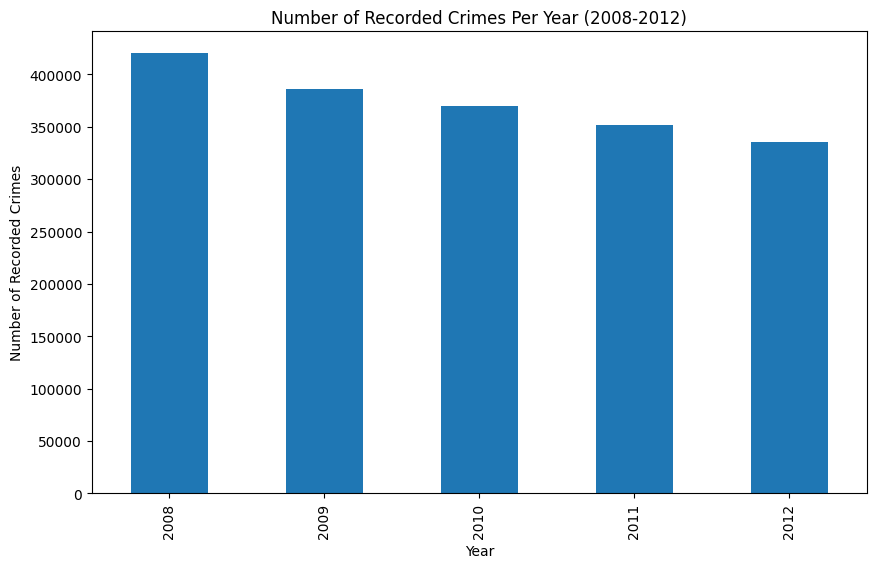

In [9]:
# Grouping the data by year and counting the number of crimes for each year
crime_counts_by_year = chicago_crime_2008_to_2012_df['Date'].dt.year.value_counts().sort_index()

# Plotting the number of recorded crimes over the years (THE PLOT SHOWS A DECREASE IN CRIME IN THIS TIME PERIOD)
plt.figure(figsize=(10, 6))
crime_counts_by_year.plot(kind='bar')
plt.title('Number of Recorded Crimes Per Year (2008-2012)')
plt.xlabel('Year')
plt.ylabel('Number of Recorded Crimes')
plt.show()


**3.5** By how many percentage points has the crime rate increased/decreased during the period? 

Hint: You only need to compare the number of crime records from 2008 with the number of crime records from 2012.

In [10]:
# Counting the number of crimes in 2008 and 2012
crimes_2008 = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df['Date'].dt.year == 2008].shape[0]
crimes_2012 = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df['Date'].dt.year == 2012].shape[0]

# Calculating the percentage change
percentage_change = ((crimes_2012 - crimes_2008) / crimes_2008) * 100

print(f"Percentage change in crime rate from 2008 to 2012: {percentage_change:.2f}%")


Percentage change in crime rate from 2008 to 2012: -20.10%


**3.6** Which primary crime types have increasing crime record numbers, and which ones have decreasing, when comparing 2008 to 2012?

In [11]:
# Grouping the data by year and primary crime type, then counting
crime_counts_by_type_and_year = chicago_crime_2008_to_2012_df.groupby([chicago_crime_2008_to_2012_df['Date'].dt.year, 'Primary Type']).size()

# Extracting crime counts for 2008 and 2012
crime_counts_2008 = crime_counts_by_type_and_year.loc[2008]
crime_counts_2012 = crime_counts_by_type_and_year.loc[2012]

# Calculating the difference in crime counts between 2012 and 2008 for each crime type
crime_difference = crime_counts_2012 - crime_counts_2008

# Identifying increasing and decreasing crime types
increasing_crime_types = crime_difference[crime_difference > 0].sort_values(ascending=False)
decreasing_crime_types = crime_difference[crime_difference < 0].sort_values()

print("Primary Crime Types with Increasing Record Numbers from 2008 to 2012:")
print(increasing_crime_types)
print("\nPrimary Crime Types with Decreasing Record Numbers from 2008 to 2012:")
print(decreasing_crime_types)


Primary Crime Types with Increasing Record Numbers from 2008 to 2012:
Primary Type
INTERFERENCE WITH PUBLIC OFFICER    654.0
WEAPONS VIOLATION                    78.0
STALKING                             22.0
OBSCENITY                            14.0
PUBLIC PEACE VIOLATION               14.0
PUBLIC INDECENCY                     13.0
CRIMINAL SEXUAL ASSAULT              12.0
HOMICIDE                              2.0
dtype: float64

Primary Crime Types with Decreasing Record Numbers from 2008 to 2012:
Primary Type
CRIMINAL DAMAGE              -16341.0
BATTERY                      -16318.0
THEFT                        -10925.0
NARCOTICS                     -9586.0
OTHER OFFENSE                 -8593.0
ASSAULT                       -5363.0
CRIMINAL TRESPASS             -4005.0
BURGLARY                      -3161.0
ROBBERY                       -3108.0
PROSTITUTION                  -2886.0
MOTOR VEHICLE THEFT           -2136.0
DECEPTIVE PRACTICE             -999.0
GAMBLING                  

**3.7*** Which are the top 5 primary crime types in terms of increasing crime records between 2008 and 2012? Which are the top 5 primary crime types in terms of *percentual* increase? 

Are the top 5 lists you just produced different? If so, why?   

In [12]:
# Top 5 by Absolute Increase, rounded to three decimal places
top_5_absolute_increase = increasing_crime_types.head(5).round(2)
print("Top 5 Primary Crime Types by Absolute Increase from 2008 to 2012:")
print(top_5_absolute_increase)

# Calculating percentual increase and rounding to three decimal places
percentual_increase = ((crime_counts_2012 - crime_counts_2008) / crime_counts_2008 * 100).round(2)

# Filtering to include only crime types that had records in both years and sorting
top_5_percentual_increase = percentual_increase[percentual_increase > 0].sort_values(ascending=False).head(5)
print("\nTop 5 Primary Crime Types by Percentual Increase from 2008 to 2012:")
print(top_5_percentual_increase)


Top 5 Primary Crime Types by Absolute Increase from 2008 to 2012:
Primary Type
INTERFERENCE WITH PUBLIC OFFICER    654.0
WEAPONS VIOLATION                    78.0
STALKING                             22.0
OBSCENITY                            14.0
PUBLIC PEACE VIOLATION               14.0
dtype: float64

Top 5 Primary Crime Types by Percentual Increase from 2008 to 2012:
Primary Type
PUBLIC INDECENCY                    325.00
OBSCENITY                           116.67
INTERFERENCE WITH PUBLIC OFFICER    113.94
CRIMINAL SEXUAL ASSAULT              48.00
STALKING                             11.89
dtype: float64


# 4 - Chicago Police Departement performance assessment

**4.1** How many recorded crimes have in total led to an arrest? What's the corresponding arrest percentage?

In [13]:
# Counting the total number of crimes that led to an arrest
total_arrests = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df['Arrest'] == True].shape[0]
print(f"Total number of recorded crimes that led to an arrest: {total_arrests}")

# Calculating the total number of recorded crimes
total_crimes = chicago_crime_2008_to_2012_df.shape[0]

# Calculating the arrest percentage
arrest_percentage = (total_arrests / total_crimes) * 100
print(f"Arrest percentage: {arrest_percentage:.2f}%")


Total number of recorded crimes that led to an arrest: 504327
Arrest percentage: 27.08%


**4.2** Has the arrest rate percentage been increasing, decreasing or remained stable over these years?

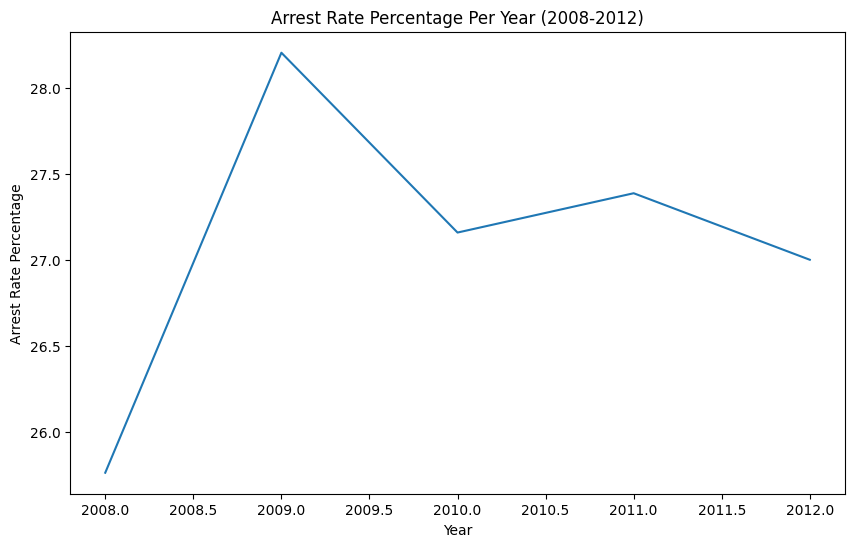

In [14]:
# Grouping data by year and calculating the number of arrests and total crimes for each year
yearly_data = chicago_crime_2008_to_2012_df.groupby(chicago_crime_2008_to_2012_df['Date'].dt.year)
yearly_arrests = yearly_data['Arrest'].sum()
yearly_total_crimes = yearly_data.size()

# Calculating the arrest rate percentage for each year
yearly_arrest_rate = (yearly_arrests / yearly_total_crimes) * 100

# Plotting the arrest rate percentage over the years
plt.figure(figsize=(10, 6))
yearly_arrest_rate.plot(kind='line')
plt.title('Arrest Rate Percentage Per Year (2008-2012)')
plt.xlabel('Year')
plt.ylabel('Arrest Rate Percentage')
plt.show()


**4.3** For the Year 2011, which month has the highest arrest percentage?

In [15]:
# Filtering data for the year 2011
crimes_2011 = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df['Date'].dt.year == 2011]

# Grouping by month and calculating the number of arrests and total crimes for each month
monthly_data_2011 = crimes_2011.groupby(crimes_2011['Date'].dt.month)
monthly_arrests_2011 = monthly_data_2011['Arrest'].sum()
monthly_total_crimes_2011 = monthly_data_2011.size()

# Calculating the arrest rate percentage for each month
monthly_arrest_rate_2011 = (monthly_arrests_2011 / monthly_total_crimes_2011) * 100

# Identifying the month with the highest arrest percentage
highest_arrest_month = monthly_arrest_rate_2011.idxmax()
highest_arrest_percentage = monthly_arrest_rate_2011.max()

print(f"The month with the highest arrest percentage in 2011 is: Month {highest_arrest_month} ({highest_arrest_percentage:.2f}%)")


The month with the highest arrest percentage in 2011 is: Month 3 (29.33%)


**4.4** For the same year, and the particular month of you've identified in question 2.3, which primary crime type has the highest number of arrests?

In [17]:
# Filtering data for the specific month and year 2011
crimes_specific_month_2011 = crimes_2011[crimes_2011['Date'].dt.month == highest_arrest_month]

# Grouping by primary crime type and counting the number of arrests
crime_type_arrests = crimes_specific_month_2011.groupby('Primary Type')['Arrest'].sum()

# Identifying the primary crime type with the highest number of arrests
highest_arrest_crime_type = crime_type_arrests.idxmax()
highest_arrests_count = crime_type_arrests.max()

print(f"In month {highest_arrest_month} of 2011, the primary crime type with the highest number of arrests is '{highest_arrest_crime_type}' with {highest_arrests_count} arrests.")


In month 3 of 2011, the primary crime type with the highest number of arrests is 'NARCOTICS' with 3744 arrests.


**4.5*** Which primary crime categories enjoy the highest percentual increase in number of arrests, while comparing 2008 and 2012? At what location do these arrest most often occur? Also answer, for the same prime categories, at what location the crimes that dont lead to an arrest most often occur. Can you find some interesting relations?

In [16]:
# Filter the Chicago crime dataset for the years 2008 and 2012
crimes_2008 = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df['Year'] == 2008]
crimes_2012 = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df['Year'] == 2012]

# Group the data by primary crime type and year and calculate the number of arrests
arrests_2008 = crimes_2008.groupby('Primary Type')['Arrest'].sum()
arrests_2012 = crimes_2012.groupby('Primary Type')['Arrest'].sum()

# Calculate the percentual increase in the number of arrests from 2008 to 2012
percentual_increase = ((arrests_2012 - arrests_2008) / arrests_2008) * 100

# Identify the primary crime categories with the highest percentual increase
top_categories = percentual_increase.nlargest(5)  # You can adjust the number as needed

# Print the top categories and their percentual increase
print("Top Crime Categories with Highest Percentual Increase in Arrests (2008 to 2012):")
print(top_categories)

# Find the locations where arrests most often occurred in 2012 for these categories
top_categories_names = top_categories.index.tolist()
locations_arrests_2012 = crimes_2012[crimes_2012['Primary Type'].isin(top_categories_names)]['Location Description']

# Find the locations where crimes without arrests most often occurred in 2012 for these categories
locations_no_arrests_2012 = crimes_2012[crimes_2012['Primary Type'].isin(top_categories_names) & (crimes_2012['Arrest'] == False)]['Location Description']

# Print the locations for both arrests and no arrests
print("\nLocations where Arrests Most Often Occurred in 2012:")
print(locations_arrests_2012.value_counts().idxmax())

print("\nLocations where Crimes without Arrests Most Often Occurred in 2012:")
print(locations_no_arrests_2012.value_counts().idxmax())

#print("\nThe results show that domestic violence is most prevalent when it comes to both crimes that lead to an arrest and the ones where the criminals were not arrested.")
print("\nTop 3Locations where Arrests Most Often Occurred in 2012:")
print(locations_arrests_2012.value_counts().nlargest(3))
print("\nTop 3 locations where Crimes without Arrests Most Often Occurred in 2012:")
print(locations_no_arrests_2012.value_counts().nlargest(3))


Top Crime Categories with Highest Percentual Increase in Arrests (2008 to 2012):
Primary Type
PUBLIC INDECENCY                    466.666667
INTERFERENCE WITH PUBLIC OFFICER    153.711790
OBSCENITY                            91.666667
STALKING                             58.333333
DECEPTIVE PRACTICE                   39.008419
Name: Arrest, dtype: float64

Locations where Arrests Most Often Occurred in 2012:
RESIDENCE

Locations where Crimes without Arrests Most Often Occurred in 2012:
RESIDENCE

Top 3Locations where Arrests Most Often Occurred in 2012:
Location Description
RESIDENCE       3591
CTA PLATFORM    1442
STREET          1392
Name: count, dtype: int64

Top 3 locations where Crimes without Arrests Most Often Occurred in 2012:
Location Description
RESIDENCE    3524
OTHER         975
APARTMENT     796
Name: count, dtype: int64


# 5 - Troubles at home

**5.1** How many recorded crimes are domestic?

In [18]:
# Filter the Chicago crime dataset for domestic crimes
domestic_crimes = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df['Domestic'] == True]

# Count the number of domestic crimes
num_domestic_crimes = domestic_crimes.shape[0]

# Print the result
print(f"The number of recorded crimes that are domestic is: {num_domestic_crimes}")


The number of recorded crimes that are domestic is: 307134


**5.2** How many recorded crimes, of the primary type *offense involving children*, are domestic?

In [19]:
# Filter the Chicago crime dataset for crimes of the primary type "Offense Involving Children" and that are domestic
children_offense_domestic = chicago_crime_2008_to_2012_df[(chicago_crime_2008_to_2012_df['Primary Type'] == 'OFFENSE INVOLVING CHILDREN') & (chicago_crime_2001_to_2023_df['Domestic'] == True)]

# Count the number of domestic crimes of the specified primary type
num_children_offense_domestic = children_offense_domestic.shape[0]

# Print the result
print(f"The number of recorded crimes of the primary type 'Offense Involving Children' that are domestic is: {num_children_offense_domestic}")


The number of recorded crimes of the primary type 'Offense Involving Children' that are domestic is: 10169


**5.3** How much more likely is it that an offense involving children is domestic?

In [20]:
# Filter the Chicago crime dataset for offenses involving children
offenses_involving_children = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df['Primary Type'] == 'OFFENSE INVOLVING CHILDREN']

# Count the number of offenses involving children
num_offenses_involving_children = offenses_involving_children.shape[0]

# Count the number of domestic offenses involving children
num_domestic_children_offenses = children_offense_domestic.shape[0]

# Calculate the likelihood ratio
likelihood_ratio = num_domestic_children_offenses / num_offenses_involving_children

# Print the result
print(f"The likelihood that an offense involving children is domestic is approximately {likelihood_ratio:.2f} times more likely.")


The likelihood that an offense involving children is domestic is approximately 0.86 times more likely.


**5.4** What's the worst weekday in terms of number of domestic offenses involving children? How does it compare to the other weekdays?

The worst weekday in terms of the number of domestic offenses involving children is Friday, with 1906 offenses.

Comparison to other weekdays:
Day_of_Week
Saturday     1607
Sunday       1562
Thursday     1311
Wednesday    1302
Tuesday      1264
Monday       1217
Name: count, dtype: int64


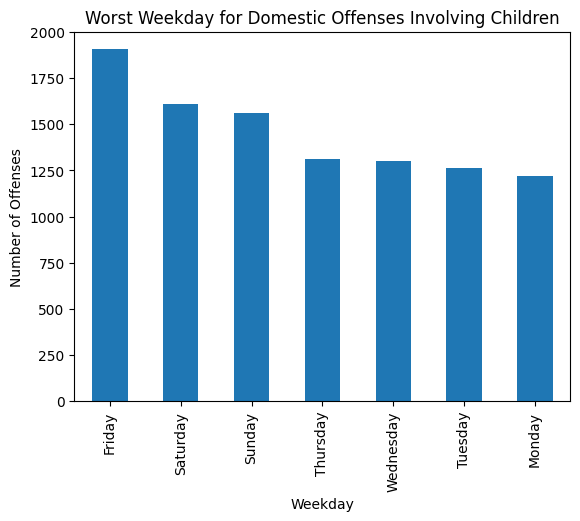

In [21]:
# Filter the Chicago crime dataset for offenses involving children that are domestic
children_offense_domestic = chicago_crime_2008_to_2012_df[(chicago_crime_2008_to_2012_df['Primary Type'] == 'OFFENSE INVOLVING CHILDREN') & (chicago_crime_2001_to_2023_df['Domestic'] == True)]

# Extract the day of the week from the "Date" column
children_offense_domestic['Day_of_Week'] = children_offense_domestic['Date'].dt.day_name()

# Group the data by the day of the week and count the number of offenses for each day
weekday_counts = children_offense_domestic['Day_of_Week'].value_counts()

# Find the worst weekday with the highest number of domestic offenses involving children
worst_weekday = weekday_counts.idxmax()
worst_weekday_count = weekday_counts.max()

# Print the result
print(f"The worst weekday in terms of the number of domestic offenses involving children is {worst_weekday}, with {worst_weekday_count} offenses.")

# Compare the count for the worst weekday to counts for other weekdays
weekday_counts.drop(index=worst_weekday, inplace=True)
print("\nComparison to other weekdays:")
print(weekday_counts)

# Visualize the worst weekday and compare it to other weekdays
children_offense_domestic['Day_of_Week'].value_counts().plot(kind='bar', title='Worst Weekday for Domestic Offenses Involving Children')
plt.xlabel('Weekday')
plt.ylabel('Number of Offenses')
plt.show()



**5.5** What's the distribution, in terms of recorded crimes, for domestic *and* sexual offenses involving children? What's the arrest percentage for each? 

In [22]:
# Filter the Chicago crime dataset for offenses involving children that are both domestic and sexual
children_sexual_offenses_domestic = chicago_crime_2008_to_2012_df[
    (chicago_crime_2008_to_2012_df['Primary Type'] == 'OFFENSE INVOLVING CHILDREN') &
    (chicago_crime_2008_to_2012_df['Domestic'] == True) &
    (chicago_crime_2008_to_2012_df['Description'].str.contains('SEXUAL'))
]

# Calculate the distribution of recorded crimes for this combined category
crime_distribution = children_sexual_offenses_domestic['Description'].value_counts()

# Calculate the total number of crimes in this category
total_crimes = crime_distribution.sum()

# Calculate the arrest percentage for each category within this combined category
arrest_percentage = (children_sexual_offenses_domestic.groupby('Description')['Arrest'].sum() / crime_distribution) * 100

# Print the distribution of recorded crimes and arrest percentage
print("Distribution of Recorded Crimes for Domestic and Sexual Offenses Involving Children:")
print(crime_distribution)

print("\nArrest Percentage for Each Category within Domestic and Sexual Offenses Involving Children:")
print(arrest_percentage.round(2))


Distribution of Recorded Crimes for Domestic and Sexual Offenses Involving Children:
Description
AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER    33
AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER      29
SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER                8
CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER                  6
Name: count, dtype: int64

Arrest Percentage for Each Category within Domestic and Sexual Offenses Involving Children:
Description
AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER      24.14
AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER    30.30
CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER                  0.00
SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER                0.00
dtype: float64


**5.6*** What period of the day does the specific kind of (domestic) offense against children, with the most recorded arrests, tend do occur? 

How does it look for all weekdays individually?
        Can you find certain periods of the week that are especially bad? 

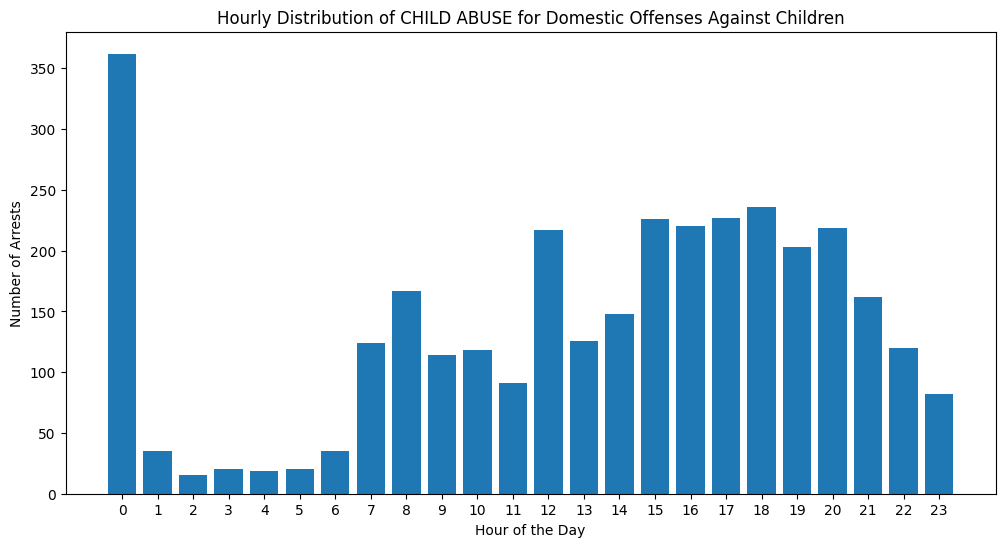

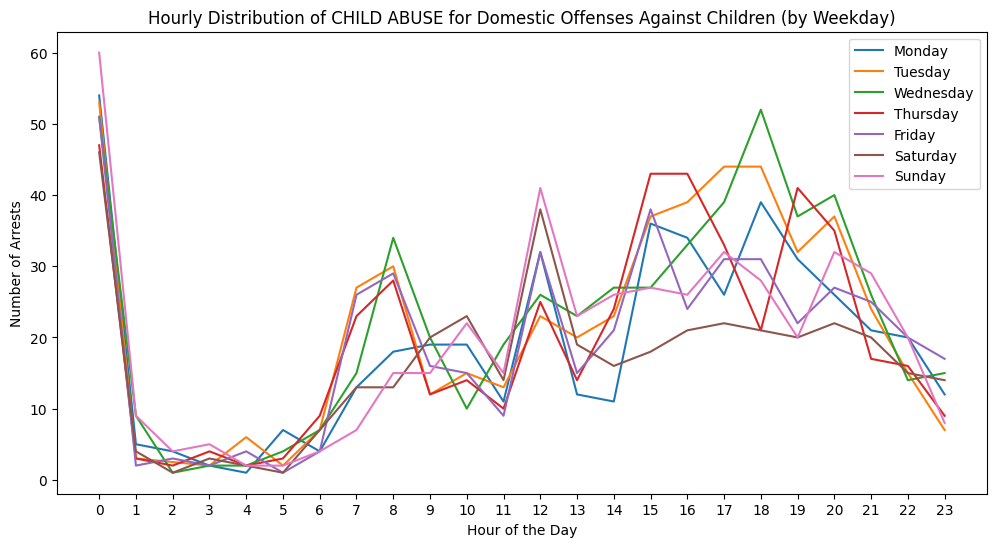

In [23]:
# Filter the Chicago crime dataset for domestic offenses against children
domestic_offenses_children = chicago_crime_2008_to_2012_df[
    (chicago_crime_2008_to_2012_df['Primary Type'] == 'OFFENSE INVOLVING CHILDREN') &
    (chicago_crime_2008_to_2012_df['Domestic'] == True)
]

# Identify the specific kind of offense against children with the most recorded arrests
most_arrested_offense = domestic_offenses_children['Description'].value_counts().idxmax()

# Extract the hour of the day from the "Date" column
domestic_offenses_children['Hour'] = domestic_offenses_children['Date'].dt.hour

# Create a new column 'Day_of_Week' to extract the day of the week
domestic_offenses_children['Day_of_Week'] = domestic_offenses_children['Date'].dt.day_name()

# Group the data by the hour of the day and count the number of arrests for each hour
hourly_arrest_counts = domestic_offenses_children[domestic_offenses_children['Description'] == most_arrested_offense]['Hour'].value_counts()

# Sort the hourly counts by hour
hourly_arrest_counts = hourly_arrest_counts.sort_index()

# Create a bar chart to visualize the distribution of arrests by hour
plt.figure(figsize=(12, 6))
plt.bar(hourly_arrest_counts.index, hourly_arrest_counts.values)
plt.title(f"Hourly Distribution of {most_arrested_offense} for Domestic Offenses Against Children")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Arrests")
plt.xticks(range(24))
plt.show()

# Analyze the distribution of arrests by hour for all weekdays individually
weekday_hourly_arrests = {}
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

for weekday in weekdays:
    arrests_by_hour = domestic_offenses_children[
        (domestic_offenses_children['Description'] == most_arrested_offense) &
        (domestic_offenses_children['Day_of_Week'] == weekday)
    ]['Hour'].value_counts().sort_index()
    weekday_hourly_arrests[weekday] = arrests_by_hour

# Create a line chart to visualize the distribution of arrests by hour for each weekday
plt.figure(figsize=(12, 6))
for weekday in weekdays:
    plt.plot(weekday_hourly_arrests[weekday].index, weekday_hourly_arrests[weekday].values, label=weekday)

plt.title(f"Hourly Distribution of {most_arrested_offense} for Domestic Offenses Against Children (by Weekday)")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Arrests")
plt.xticks(range(24))
plt.legend()
plt.show()
#### interactive chart ####
# Create a DataFrame for the weekday_hourly_arrests
df_weekday_hourly_arrests = pd.DataFrame(weekday_hourly_arrests)

# Rename the columns to match Plotly's expectations
df_weekday_hourly_arrests.columns = weekdays

# Create an interactive line chart using Plotly Express
fig = px.line(df_weekday_hourly_arrests, x=df_weekday_hourly_arrests.index, y=weekdays, labels={'index': 'Hour of the Day', 'value': 'Number of Arrests'})
fig.update_layout(title=f"Hourly Distribution of {most_arrested_offense} for Domestic Offenses Against Children (by Weekday)", xaxis=dict(tickvals=list(range(24))))
fig.show()


**5.7*** Looking at any given year as a whole, what's the worst period in terms of domestic number of offenses involving children? Can you find any trends? Does the trend seem to be consistent for every other year? 

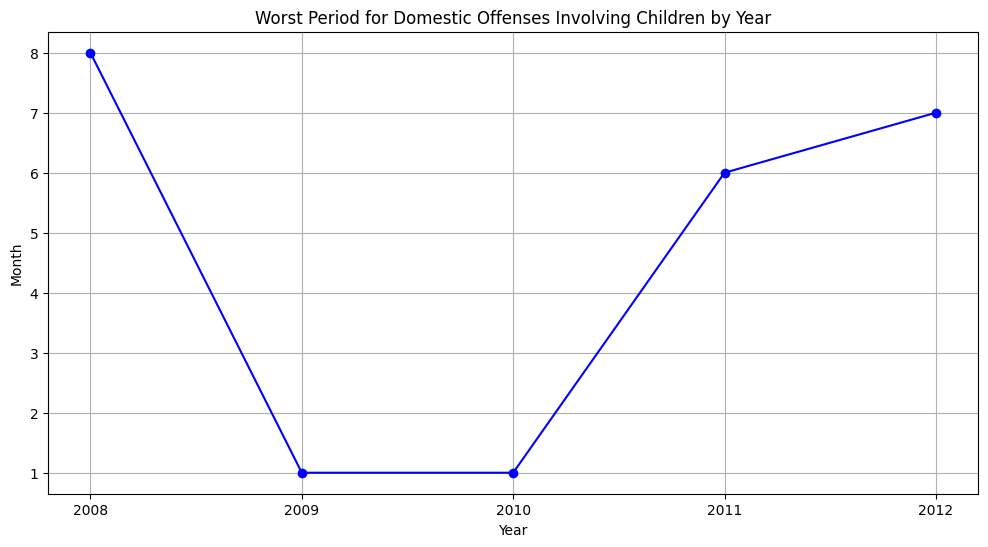

Worst Periods for Domestic Offenses Involving Children by Year:
    Year  Month   ID
7   2008      8  189
12  2009      1  204
24  2010      1  229
41  2011      6  187
54  2012      7  177
It is hard to see a conspicuous trend in terms of period of year and prevalence of domestic offences involving children.
 However, one might say that there is a correlation between the specified crime and children being
 home from school for an extended period of time in January and Summer vacations.


In [24]:
# Extract the year and month from the 'Date' column
domestic_offenses_children['Year'] = domestic_offenses_children['Date'].dt.year
domestic_offenses_children['Month'] = domestic_offenses_children['Date'].dt.month

# Group the data by year and month, and count the number of domestic offenses involving children
yearly_monthly_counts = domestic_offenses_children.groupby(['Year', 'Month'])['ID'].count().reset_index()

# Find the worst period (month) for domestic offenses involving children in each year
worst_periods = yearly_monthly_counts.groupby('Year')['ID'].idxmax()
worst_periods_data = yearly_monthly_counts.loc[worst_periods]

# Plot the worst periods for each year
plt.figure(figsize=(12, 6))
plt.plot(worst_periods_data['Year'], worst_periods_data['Month'], marker='o', linestyle='-', color='b')
plt.title("Worst Period for Domestic Offenses Involving Children by Year")
plt.xlabel("Year")
plt.ylabel("Month")
plt.xticks(yearly_monthly_counts['Year'].unique())
plt.grid(True)
plt.show()

# Analyze trends and consistency in the worst periods
print("Worst Periods for Domestic Offenses Involving Children by Year:")
print(worst_periods_data)
print("It is hard to see a conspicuous trend in terms of period of year and prevalence of domestic offences involving children.\n However, one might say that there is a correlation between the specified crime and children being\n home from school for an extended period of time in January and Summer vacations.")


# 6 - Bad Boys Bad Boys whatcha gonna do

**6.1** In general, what weekday is a crime most likely to occur? Which day is the safest?

In [25]:
# Extract the weekday from the 'Date' column (0 = Monday, 6 = Sunday)
chicago_crime_2008_to_2012_df['Day_of_Week'] = chicago_crime_2008_to_2012_df['Date'].dt.dayofweek

# Count the number of crimes for each weekday
weekday_counts = chicago_crime_2008_to_2012_df['Day_of_Week'].value_counts().sort_index()

# Define weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Find the weekday with the most and least crimes
most_likely_day = weekdays[weekday_counts.idxmax()]
safest_day = weekdays[weekday_counts.idxmin()]

print(f"The most likely day for a crime to occur is {most_likely_day}.")
print(f"The safest day is {safest_day}.")


The most likely day for a crime to occur is Friday.
The safest day is Sunday.


**6.2** Which is the most unsafe weekday for you if you'd like to avoid the following:

a) getting your phone stolen by sneaky pickpockets (THEFT) 

b) having your handbag forcibly pulled away (ROBBERY) 

c) getting jumped in an alley (ASSAULT)

For each of the above crimes, also answer at what locations you should be extra careful around.

In [26]:
# Specify the crimes of interest
crime_types = ['THEFT', 'ROBBERY', 'ASSAULT']

for crime_type in crime_types:
    # Filter the data for the specific crime type
    crime_data = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df['Primary Type'] == crime_type]
    
    # Extract the weekday from the 'Date' column (0 = Monday, 6 = Sunday)
    crime_data['Day_of_Week'] = crime_data['Date'].dt.dayofweek
    
    # Count the number of crimes for each weekday
    weekday_counts = crime_data['Day_of_Week'].value_counts().sort_index()
    
    # Define weekdays
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    # Find the weekday with the most crimes for the specific crime type
    most_unsafe_day = weekdays[weekday_counts.idxmax()]
    
    # Get the locations associated with the most crimes on the most unsafe day
    locations_on_most_unsafe_day = crime_data[crime_data['Day_of_Week'] == weekday_counts.idxmax()]['Location Description'].value_counts().idxmax()
    
    print(f"For {crime_type}:\n")
    print(f"The most unsafe day to avoid this crime is {most_unsafe_day}.")
    print(f"You should be extra careful around {locations_on_most_unsafe_day}.\n")


For THEFT:

The most unsafe day to avoid this crime is Friday.
You should be extra careful around STREET.

For ROBBERY:

The most unsafe day to avoid this crime is Friday.
You should be extra careful around SIDEWALK.

For ASSAULT:

The most unsafe day to avoid this crime is Wednesday.
You should be extra careful around STREET.



**6.3** Which are the worst 10 dates (most recorded crimes) of 2008? Does this trend hold for the other years?

In [27]:
# Filter the data for the year 2008
crimes_2008 = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df['Year'] == 2008]

# Group the data by date (date part only) and count the number of crimes for each date
worst_dates_2008 = crimes_2008['Date'].dt.date.value_counts().head(10)

# Print the worst 10 dates for 2008
print("Worst 10 Dates with Most Recorded Crimes in 2008:")
print(worst_dates_2008)

# Check if the same dates (date part only) are among the worst for other years
for year in range(2009, 2013):  # Loop through all years in the dataset
    if year != 2008:  # Skip the year 2008 (already analyzed)
        # Filter the data for the current year
        crimes_year = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df['Year'] == year]
        
        # Group the data by date (date part only) and count the number of crimes for each date
        worst_dates_year = crimes_year['Date'].dt.date.value_counts().head(10)
        
        # Check if the worst dates for the current year (date part only) match those of 2008
        if worst_dates_year.index.equals(worst_dates_2008.index):
            print(f"\nWorst 10 Dates with Most Recorded Crimes in {year} also match those of 2008.")
        else:
            print(f"\nWorst 10 Dates with Most Recorded Crimes in {year} do not match those of 2008.")

### Visualization ###
import plotly.graph_objs as go

# Filter the data for the years 2008 to 2012
years_to_analyze = list(range(2008, 2013))
data_to_plot = []

for year in years_to_analyze:
    # Filter the data for the current year
    crimes_year = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df['Year'] == year]
    
    # Group the data by date (date part only) and count the number of crimes for each date
    worst_dates_year = crimes_year['Date'].dt.date.value_counts().head(10)
    
    # Store the data for plotting
    for date, count in worst_dates_year.items():
        data_to_plot.append({'Year': year, 'Date': date})

# Create a DataFrame from the data to plot
df_to_plot = pd.DataFrame(data_to_plot)

# Extract month, year, and day from the Date column
df_to_plot['Year'] = df_to_plot['Year'].astype(int)  # Convert Year column to int for color
df_to_plot['Month'] = pd.to_datetime(df_to_plot['Date']).dt.month
df_to_plot['Day'] = pd.to_datetime(df_to_plot['Date']).dt.day

# Create a 3D scatter plot with colors based on the year
fig = go.Figure(data=[go.Scatter3d(
    x=df_to_plot['Month'],
    y=df_to_plot['Year'],
    z=df_to_plot['Day'],
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.8,
        color=df_to_plot['Year'],  # Assign colors based on the 'Year' column
        colorscale='Viridis',     # You can change the color scale as desired
        colorbar=dict(title='Year')
    ),
    text=df_to_plot['Date']
)])

# Update axis labels and title
fig.update_layout(scene=dict(xaxis_title='Month', yaxis_title='Year', zaxis_title='Day of Month'),
                  title='Distribution of Worst 10 Dates with Most Recorded Crimes (2008-2012)')
fig.show()





Worst 10 Dates with Most Recorded Crimes in 2008:
Date
2008-01-01    1472
2008-08-01    1459
2008-10-10    1439
2008-08-22    1422
2008-10-31    1421
2008-08-15    1412
2008-09-19    1412
2008-11-01    1405
2008-09-01    1404
2008-05-01    1393
Name: count, dtype: int64



Worst 10 Dates with Most Recorded Crimes in 2009 do not match those of 2008.

Worst 10 Dates with Most Recorded Crimes in 2010 do not match those of 2008.

Worst 10 Dates with Most Recorded Crimes in 2011 do not match those of 2008.

Worst 10 Dates with Most Recorded Crimes in 2012 do not match those of 2008.


**6.4** From the perspective of total number of crime records, which are the Top 10 primary crime types? Which are the Bottom 10? 

Consider this question for the years 2008-2012 as a whole. 

In [28]:
chicago_crime_2001_to_2023_df

# Group the data by primary crime type and count the number of records for each type
crime_type_counts = chicago_crime_2008_to_2012_df['Primary Type'].value_counts()

# Get the top 10 and bottom 10 primary crime types
top_10_crime_types = crime_type_counts.head(10)
bottom_10_crime_types = crime_type_counts.tail(10)

print("Top 10 Primary Crime Types (2008-2012):")
print(top_10_crime_types)

print("\nBottom 10 Primary Crime Types (2008-2012):")
print(bottom_10_crime_types)


Top 10 Primary Crime Types (2008-2012):
Primary Type
THEFT                  392950
BATTERY                328135
CRIMINAL DAMAGE        213263
NARCOTICS              204644
BURGLARY               128334
OTHER OFFENSE          111057
ASSAULT                109698
MOTOR VEHICLE THEFT     88827
ROBBERY                 74137
DECEPTIVE PRACTICE      65537
Name: count, dtype: int64

Bottom 10 Primary Crime Types (2008-2012):
Primary Type
HOMICIDE                            2365
KIDNAPPING                          1461
INTIMIDATION                        1011
STALKING                             924
CRIMINAL SEXUAL ASSAULT              146
OBSCENITY                            131
PUBLIC INDECENCY                      51
OTHER NARCOTIC VIOLATION              36
NON-CRIMINAL                           7
NON-CRIMINAL (SUBJECT SPECIFIED)       2
Name: count, dtype: int64


**6.5** For all those crime categories you identified in 6.4, how does their distribution instead look per year - rather than the full 2008-2012 period as a whole?

In [29]:
import plotly.express as px

# Filter the data for the years 2008 to 2012
years_to_analyze = list(range(2008, 2013))
crimes_2008_to_2012 = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df['Year'].isin(years_to_analyze)]

# Define the top and bottom crime categories from question 6.4
top_crime_categories = ['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'BURGLARY',
                        'OTHER OFFENSE', 'ASSAULT', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'DECEPTIVE PRACTICE']
bottom_crime_categories = ['HOMICIDE', 'KIDNAPPING', 'INTIMIDATION', 'STALKING',
                           'CRIMINAL SEXUAL ASSAULT', 'OBSCENITY', 'PUBLIC INDECENCY', 'OTHER NARCOTIC VIOLATION',
                           'NON-CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)']

# Create a DataFrame to store data for the interactive plot
data_to_plot = []

# Iterate over top crime categories
for crime_category in top_crime_categories + bottom_crime_categories:
    # Filter data for the current crime category
    crime_data = crimes_2008_to_2012[crimes_2008_to_2012['Primary Type'] == crime_category]
    
    # Group data by year and count the number of records for each year
    year_counts = crime_data.groupby('Year').size().reset_index(name='Count')
    
    # Add the crime category as a column
    year_counts['Crime Category'] = crime_category
    
    # Append data to the main DataFrame
    data_to_plot.append(year_counts)

# Create a DataFrame from the combined data
df_to_plot = pd.concat(data_to_plot, ignore_index=True)

# Create an interactive line plot using Plotly Express
fig = px.line(df_to_plot, x='Year', y='Count', color='Crime Category',
              title='Distribution of Crime Categories per Year (2008-2012)',
              labels={'Year': 'Year', 'Count': 'Number of Records'},
              line_shape='linear')

# Show the interactive plot
fig.show()


**6.6*** Which primary crime types does the city of Chicago seem to get better at preventing? For which ones is it the opposite, i.e, the situation is getting worse? 

In [30]:


# Group the data by primary crime type and count the number of crimes for each type in each year
crime_counts = chicago_crime_2008_to_2012_df.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')

# Pivot the data to have years as columns and primary crime types as rows
crime_pivot = crime_counts.pivot(index='Primary Type', columns='Year', values='Count')

# Fill missing values with 0 (for crime types that didn't occur in certain years)
crime_pivot = crime_pivot.fillna(0)

# Calculate the change in crime counts between 2008 and 2012
crime_pivot['Change'] = crime_pivot[2012] - crime_pivot[2008]

# Sort the data by the change in crime counts in descending order to identify trends
crime_trends = crime_pivot.sort_values(by='Change', ascending=False)

# Determine which crime types are getting better (decreasing) and which are getting worse (increasing)
better_prevention = crime_trends[crime_trends['Change'] < 0]
worse_prevention = crime_trends[crime_trends['Change'] > 0]

# Display the results
print("Primary Crime Types with Better Prevention:")
print(better_prevention)

print("\nPrimary Crime Types with Worse Prevention:")
print(worse_prevention)



Primary Crime Types with Better Prevention:
Year                           2008     2009     2010     2011     2012  \
Primary Type                                                              
OTHER NARCOTIC VIOLATION       12.0      7.0      6.0      5.0      6.0   
CRIM SEXUAL ASSAULT          1388.0   1276.0   1308.0   1424.0   1354.0   
INTIMIDATION                  259.0    228.0    197.0    171.0    156.0   
KIDNAPPING                    357.0    290.0    313.0    266.0    235.0   
ARSON                         642.0    611.0    522.0    504.0    469.0   
OFFENSE INVOLVING CHILDREN   2440.0   2406.0   2520.0   2307.0   2192.0   
LIQUOR LAW VIOLATION          899.0    735.0    736.0    619.0    573.0   
SEX OFFENSE                  1388.0   1165.0   1110.0   1062.0   1038.0   
GAMBLING                     1178.0    963.0    927.0    736.0    724.0   
DECEPTIVE PRACTICE          14275.0  13273.0  12327.0  12386.0  13276.0   
MOTOR VEHICLE THEFT         18622.0  15312.0  19023.0  1

The analysis of primary crime types in Chicago from 2008 to 2012 reveals a mixed picture of crime prevention efforts. Several crime categories, including narcotics violations, sexual assaults, intimidation, and kidnapping, experienced decreases over these years, indicating improved prevention efforts. On the contrary, categories like interference with public officers, weapons violations, stalking, and homicide showed signs of worsening prevention, with increasing incidents. While progress has been made in curbing certain types of crime, challenges persist in addressing violent crimes and those related to public safety. These findings underscore the importance of targeted strategies and resources to address specific crime categories effectively and enhance overall public safety in the city.

# 7 - Night Stalker

**7.1** Are there more or less crimes reported during daytime, compared with nighttime? Daytime is considered as all hours between 06:00-18:00, nighttime is the rest of the day.

In [31]:
#chicago_crime_2001_to_2023_df.columns
# Convert the 'Date' column to datetime
chicago_crime_2008_to_2012_df['Date'] = pd.to_datetime(chicago_crime_2008_to_2012_df['Date'])

# Extract the hour from the 'Date' column
chicago_crime_2008_to_2012_df['Hour'] = chicago_crime_2008_to_2012_df['Date'].dt.hour

# 1. Create a new column to classify records as Daytime or Nighttime
chicago_crime_2008_to_2012_df['Daytime_Nighttime'] = 'Daytime'
chicago_crime_2008_to_2012_df.loc[
    (chicago_crime_2008_to_2012_df['Hour'] < 6) | (chicago_crime_2008_to_2012_df['Hour'] >= 18),
    'Daytime_Nighttime'
] = 'Nighttime'

# 2. Count the number of crime records for each category
crime_counts = chicago_crime_2008_to_2012_df['Daytime_Nighttime'].value_counts()

# 3. Compare the counts
if crime_counts['Daytime'] > crime_counts['Nighttime']:
    print("There are more crimes reported during daytime.")
elif crime_counts['Daytime'] < crime_counts['Nighttime']:
    print("There are more crimes reported during nighttime.")
else:
    print("The number of crimes reported during daytime and nighttime is the same.")

There are more crimes reported during daytime.


**7.2** In general, for each weekday, how many crimes are recorded during daytime and how many during nighttime? What are the trends? Are there any weekdays that stands out somehow?

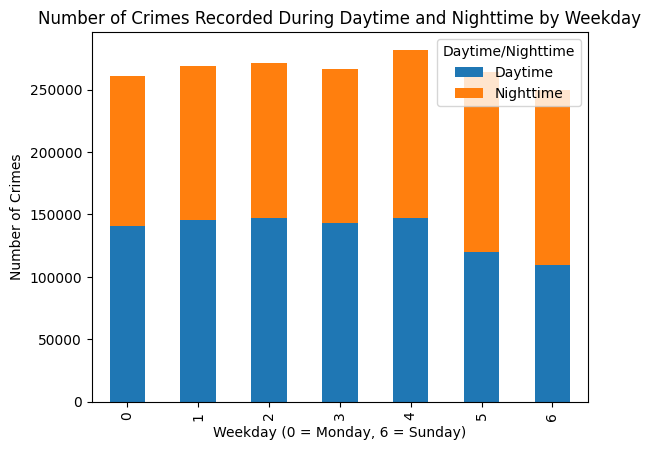

In [32]:
# Convert the 'Date' column to datetime
chicago_crime_2008_to_2012_df['Date'] = pd.to_datetime(chicago_crime_2008_to_2012_df['Date'])

# Extract the weekday from the 'Date' column (0 = Monday, 6 = Sunday)
chicago_crime_2008_to_2012_df['Weekday'] = chicago_crime_2008_to_2012_df['Date'].dt.weekday

# Extract the hour from the 'Date' column
chicago_crime_2008_to_2012_df['Hour'] = chicago_crime_2008_to_2012_df['Date'].dt.hour

# Create a new column to classify records as Daytime or Nighttime
chicago_crime_2008_to_2012_df['Daytime_Nighttime'] = 'Daytime'
chicago_crime_2008_to_2012_df.loc[
    (chicago_crime_2008_to_2012_df['Hour'] < 6) | (chicago_crime_2008_to_2012_df['Hour'] >= 18),
    'Daytime_Nighttime'
] = 'Nighttime'

# Group the data by Weekday and Daytime_Nighttime, and calculate the count
crime_counts = chicago_crime_2008_to_2012_df.groupby(['Weekday', 'Daytime_Nighttime']).size().unstack()

# Plot the results
crime_counts.plot(kind='bar', stacked=True)
plt.xlabel('Weekday (0 = Monday, 6 = Sunday)')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes Recorded During Daytime and Nighttime by Weekday')
plt.legend(title='Daytime/Nighttime')
plt.show()

**7.3** Does the trends you've found in 7.3 also hold if you look at each year individually?

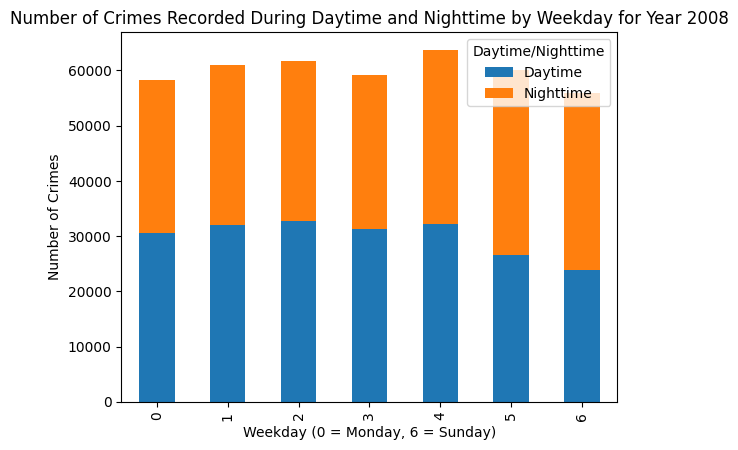

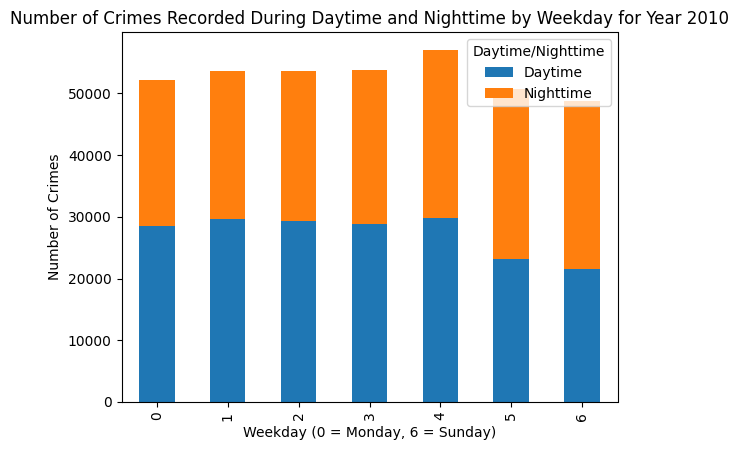

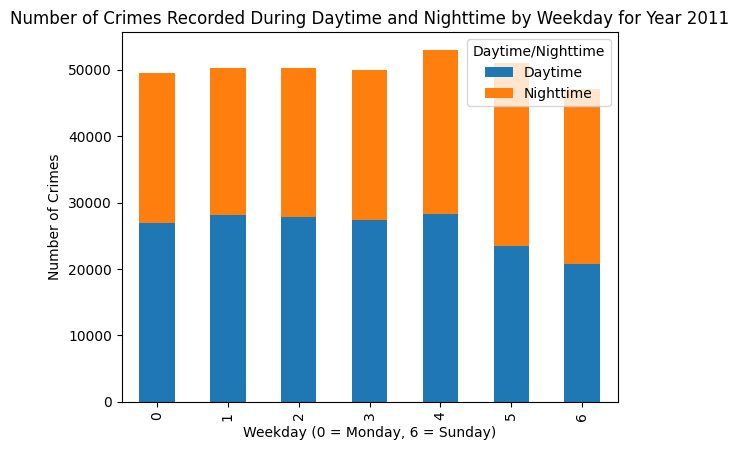

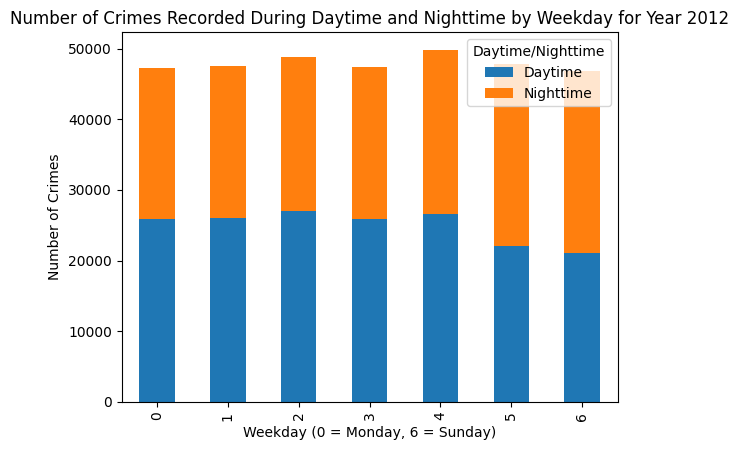

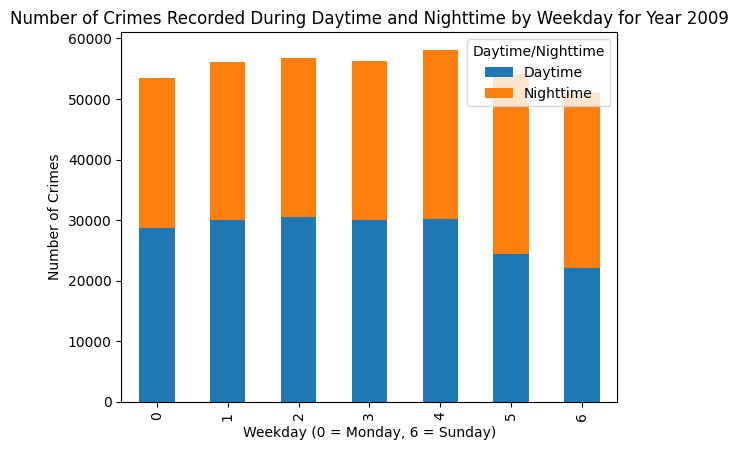

In [33]:
# Convert the 'Date' column to datetime
chicago_crime_2008_to_2012_df['Date'] = pd.to_datetime(chicago_crime_2008_to_2012_df['Date'])

# Extract the year, weekday, and hour from the 'Date' column
chicago_crime_2008_to_2012_df['Year'] = chicago_crime_2008_to_2012_df['Date'].dt.year
chicago_crime_2008_to_2012_df['Weekday'] = chicago_crime_2008_to_2012_df['Date'].dt.weekday
chicago_crime_2008_to_2012_df['Hour'] = chicago_crime_2008_to_2012_df['Date'].dt.hour

# Create a new column to classify records as Daytime or Nighttime
chicago_crime_2008_to_2012_df['Daytime_Nighttime'] = 'Daytime'
chicago_crime_2008_to_2012_df.loc[
    (chicago_crime_2008_to_2012_df['Hour'] < 6) | (chicago_crime_2008_to_2012_df['Hour'] >= 18),
    'Daytime_Nighttime'
] = 'Nighttime'

# Group the data by Year, Weekday, and Daytime_Nighttime, and calculate the count
crime_counts_by_year = chicago_crime_2008_to_2012_df.groupby(['Year', 'Weekday', 'Daytime_Nighttime']).size().unstack()

# Plot the results for each year separately
years = chicago_crime_2008_to_2012_df['Year'].unique()
for year in years:
    crime_counts_year = crime_counts_by_year.loc[year]
    crime_counts_year.plot(kind='bar', stacked=True)
    plt.xlabel('Weekday (0 = Monday, 6 = Sunday)')
    plt.ylabel('Number of Crimes')
    plt.title(f'Number of Crimes Recorded During Daytime and Nighttime by Weekday for Year {year}')
    plt.legend(title='Daytime/Nighttime')
    plt.show()

**7.4** Are there any weekdays in which Stalking occurs more often during nighttime?

In [34]:
# Filter the DataFrame for 'Stalking' crimes
stalking_df = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df['Primary Type'] == 'STALKING']

# Group by weekday and daytime/nighttime and count the records
stalking_counts = stalking_df.groupby(['Day_of_Week', 'Daytime_Nighttime']).size().unstack().fillna(0)

# Calculate the difference between nighttime and daytime counts
stalking_counts['Nighttime - Daytime'] = stalking_counts['Nighttime'] - stalking_counts['Daytime']

# Find the weekdays where the difference is greater than 0, indicating more nighttime occurrences
weekdays_with_more_nighttime_stalking = stalking_counts[stalking_counts['Nighttime - Daytime'] > 0].index.tolist()

print(f'Weekdays with more night-time stalking based on the current data: {weekdays_with_more_nighttime_stalking}')


Weekdays with more night-time stalking based on the current data: []


**7.5*** Are there any specific primary crime types that most often occur during nights? If so, which ones are they? Where do they occur? Are certain days of the week notable here somehow?

In [35]:
# Filter the DataFrame for nighttime records
nighttime_df = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df['Daytime_Nighttime'] == 'Nighttime']

# Group by primary type, location description, and day of the week, and count the records
nighttime_crime_counts = nighttime_df.groupby(['Primary Type', 'Location Description', 'Day_of_Week']).size().reset_index(name='Count')

# Find the primary crime types with the highest nighttime occurrence
top_nighttime_crime_types = nighttime_crime_counts.groupby('Primary Type')['Count'].sum().nlargest(5).index.tolist()

# Filter the DataFrame for the top nighttime crime types
top_nighttime_crimes_df = nighttime_crime_counts[nighttime_crime_counts['Primary Type'].isin(top_nighttime_crime_types)]

top_nighttime_crimes_df


,Primary Type,Location Description,Day_of_Week,Count
716,BATTERY,ABANDONED BUILDING,0,11
717,BATTERY,ABANDONED BUILDING,1,11
718,BATTERY,ABANDONED BUILDING,2,7
719,BATTERY,ABANDONED BUILDING,3,8
720,BATTERY,ABANDONED BUILDING,4,13
...,...,...,...,...
7797,THEFT,WAREHOUSE,2,30
7798,THEFT,WAREHOUSE,3,33
7799,THEFT,WAREHOUSE,4,35
7800,THEFT,WAREHOUSE,5,24


# 8 - Grand Theft Auto

**8.1** You just bought a new car. What weekday should you be most wary of as it has the highest risk for a Grand Theft Auto-style robbery (MOTOR VEHICLE THEFT)?

In [36]:
# Assuming 'Primary Type' is a column and 'MOTOR VEHICLE THEFT' is a category
gta_df = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df['Primary Type'] == 'MOTOR VEHICLE THEFT']

# Extracting day of the week
gta_df['Day_of_Week'] = gta_df['Date'].dt.dayofweek

# Counting incidents by day of the week
gta_day_counts = gta_df['Day_of_Week'].value_counts().sort_index()

# Define weekdays
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Identifying the day with the highest risk
highest_risk_day = weekdays[gta_day_counts.idxmax()]

print(f'Day with highest risk for vehicle theft is {highest_risk_day}.')


Day with highest risk for vehicle theft is Friday.


**8.2** For that day, where (at what location) should you absolutely avoid leave your car carelessly? Where is it seemingly safest to do so?

In [37]:
# Grouping by location and counting incidents
location_risk = gta_df.groupby('Location Description').size().sort_values(ascending=False)

# Identifying the riskiest and safest locations
riskiest_location = location_risk.idxmax()
safest_location = location_risk.idxmin()

print(f'For {highest_risk_day}, {riskiest_location.lower()} is the riskiest location and {safest_location.lower()} is seemingly safe.')

For Friday, street is the riskiest location and bridge is seemingly safe.


**8.3*** Are there certain periods of the year/month/day/time of day where GTA is more frequent?

In [38]:
# Extracting month and hour from the date
gta_df['Month'] = gta_df['Date'].dt.month
gta_df['Hour'] = gta_df['Date'].dt.hour

# Grouping by month and hour and counting incidents
monthly_hourly_counts = gta_df.groupby(['Month', 'Hour']).size().reset_index(name='Count')

# Creating an interactive heatmap
fig = px.density_heatmap(monthly_hourly_counts, x='Hour', y='Month', z='Count', 
                         color_continuous_scale='Viridis', 
                         labels={'Month': 'Month', 'Hour': 'Hour of the Day', 'Count': 'Number of Incidents'},
                         title='Frequency of Motor Vehicle Theft by Month and Hour')

# Display the figure
fig.show()

# 9. Just send me like location

https://www.youtube.com/watch?v=k7yBJ5Ffkdo

**9.1** Are there any (geographical) areas hit particularly hard by prostitution on friday nights?

In [39]:
# Filtering for prostitution incidents on Friday nights
prostitution_df = chicago_crime_2008_to_2012_df[
    (chicago_crime_2008_to_2012_df['Primary Type'] == 'PROSTITUTION') &
    (chicago_crime_2008_to_2012_df['Day_of_Week'] == 5)  # 5 represents Friday
]

# Grouping by block and counting incidents
prostitution_areas = prostitution_df.groupby('Block').size().sort_values(ascending=False)

# Printing top 5 blocks with the most prostitution incidents
print("Top 5 blocks hit hard by prostitution on Friday nights:")
print(prostitution_areas.head(5))


Top 5 blocks hit hard by prostitution on Friday nights:
Block
045XX W MADISON ST    29
046XX W MADISON ST    29
028XX W MADISON ST    29
038XX W NORTH AVE     23
075XX S HALSTED ST    22
dtype: int64


**9.2*** Can you vizualise the locations from 9.1 on a map of Chicago? Is there a concentration somewhere? 

In [40]:
import plotly.graph_objs as go

# Scatter Map
scatter_map = px.scatter_mapbox(prostitution_df, lat='Latitude', lon='Longitude', 
                                hover_name='Block', 
                                color_discrete_sequence=["fuchsia"], 
                                zoom=10, height=300)

scatter_map.update_layout(mapbox_style="open-street-map")
scatter_map.update_layout(title="Prostitution Incidents on Friday Nights (Scatter Map)", margin={"r":0,"t":0,"l":0,"b":0})

# Heat Map
heat_map = go.Figure(go.Densitymapbox(lat=prostitution_df['Latitude'], lon=prostitution_df['Longitude'], radius=10))
heat_map.update_layout(mapbox_style="open-street-map", mapbox_center_lon=prostitution_df['Longitude'].mean(), mapbox_center_lat=prostitution_df['Latitude'].mean())
heat_map.update_layout(title="Prostitution Incidents on Friday Nights (Heat Map)", margin={"r":0,"t":0,"l":0,"b":0}, mapbox_zoom=10)

# Display both maps
scatter_map.show()
heat_map.show()


**9.3*** Can you find any geographical concentration of other crime categories? Perhaps even by weekday and or day/nighttime or certain dates of the year? Plot these on a map of Chicago. 

In [ ]:
# Note: This section involves generating complex graph types that are computationally demanding.
# Due to current limitations in computational resources and project time constraints,
# the completion and optimization of this visualization will be scheduled for a future update.

import plotly.graph_objs as go

# Adding a column for day/night based on hour (assuming day is from 6 AM to 6 PM)
chicago_crime_2008_to_2012_df['Daytime_Nighttime'] = chicago_crime_2008_to_2012_df['Hour'].apply(lambda x: 'Day' if 6 <= x < 18 else 'Night')

# List of unique crime categories
crime_categories = chicago_crime_2008_to_2012_df['Primary Type'].unique()

# Create a figure with Plotly Graph Objects
fig = go.Figure()

# Add a trace for each crime category
for crime_type in crime_categories:
    crime_df = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df['Primary Type'] == crime_type]
    fig.add_trace(go.Scattermapbox(
        lat=crime_df['Latitude'], 
        lon=crime_df['Longitude'], 
        mode='markers', 
        marker=go.scattermapbox.Marker(size=4),
        name=crime_type, 
        visible=False))

# Update the first trace to be visible
fig.data[0].visible = True

# Create a dropdown menu for crime category selection
buttons = []
for i, crime_type in enumerate(crime_categories):
    button = dict(label=crime_type,
                  method="update",
                  args=[{"visible": [False] * len(crime_categories)},
                        {"title": f"Map of {crime_type} Incidents"}])
    button["args"][0]["visible"][i] = True  # Toggle i-th trace to "visible"
    buttons.append(button)

fig.update_layout(
    updatemenus=[dict(active=0, buttons=buttons)],
    mapbox_style="open-street-map",
    mapbox_center_lon=chicago_crime_2008_to_2012_df['Longitude'].mean(),
    mapbox_center_lat=chicago_crime_2008_to_2012_df['Latitude'].mean(),
    mapbox_zoom=10,
    title="Interactive Map of Crime Incidents by Category"
)

# Show the figure
fig.show()


# 10 - The $ factor

**10.1** Merge the crime and census datasets together in a suitable way.

In [41]:
# Merging the crime dataset with the census dataset on the community area number
# Assuming the crime dataset has a column 'Community Area' corresponding to 'Community Area Number'
merged_df = pd.merge(chicago_crime_2008_to_2012_df, chicago_census_2008_to_2012_df, 
                     left_on='Community Area', right_on='Community Area Number', 
                     how='left')

# Displaying the first few rows of the merged dataset
print("First few rows of the merged dataset:")
print(merged_df.head())


First few rows of the merged dataset:
         ID Case Number                Date  \
0   6469905    HP544270 2008-08-30 20:15:00   
1   7823660    HS634379 2010-11-19 09:00:00   
2  12059212    JD238514 2008-10-03 00:00:00   
3   8029377    HT260540 2011-04-22 02:40:00   
4   6385184    HP469645 2008-07-23 03:00:00   

                                 Block  IUCR                Primary Type  \
0                    064XX S LOREL AVE  0460                     BATTERY   
1                  076XX S ABERDEEN ST  0320                     ROBBERY   
2                      069XX W 64TH PL  1752  OFFENSE INVOLVING CHILDREN   
3  063XX S DR MARTIN LUTHER KING JR DR  0420                     BATTERY   
4                      049XX W 43RD ST  0460                     BATTERY   

                                         Description Location Description  \
0                                             SIMPLE               STREET   
1                             STRONG ARM - NO WEAPON            RESI

**10.2** Are there certain kinds of socoeconomic area that are more prone to certain kinds of crimes? Do a deep dive in the direction you fancy yourself here.

Correlation with Crime Count:
Crime Count                                     1.000000
PERCENT HOUSEHOLDS BELOW POVERTY                0.297077
PERCENT AGED 16+ UNEMPLOYED                     0.249273
HARDSHIP INDEX                                  0.215941
PERCENT OF HOUSING CROWDED                      0.134824
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA    0.061028
PER CAPITA INCOME                              -0.009738
Community Area Number                          -0.032606
PERCENT AGED UNDER 18 OR OVER 64               -0.112129
Name: Crime Count, dtype: float64


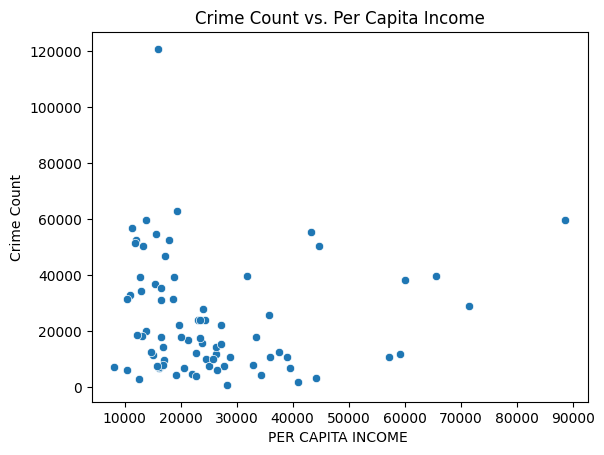

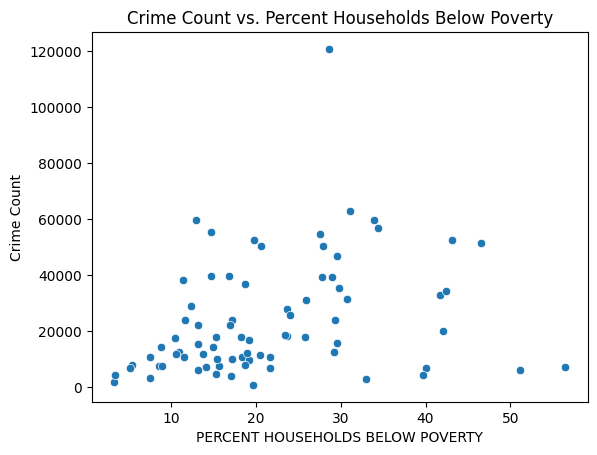

In [42]:

import seaborn as sns

# Assuming the merged dataframe is named 'merged_df'
# Calculate the crime count for each community area
crime_count_by_area = merged_df.groupby('COMMUNITY AREA NAME').size()

# Merge the crime count with the census data
merged_analysis_df = chicago_census_2008_to_2012_df.set_index('COMMUNITY AREA NAME').join(crime_count_by_area.rename('Crime Count'))

# Fill missing values (if any) with a default value or drop them
merged_analysis_df.fillna(0, inplace=True)

# Correlation Analysis
correlation_matrix = merged_analysis_df.corr()

# Display the correlation matrix focusing on the 'Crime Count' column
print("Correlation with Crime Count:")
print(correlation_matrix['Crime Count'].sort_values(ascending=False))

# Visualizations
# Plotting the relationship between 'PER CAPITA INCOME ' and 'Crime Count'
sns.scatterplot(data=merged_analysis_df, x='PER CAPITA INCOME ', y='Crime Count')
plt.title('Crime Count vs. Per Capita Income')
plt.show()

# Plotting the relationship between 'PERCENT HOUSEHOLDS BELOW POVERTY' and 'Crime Count'
sns.scatterplot(data=merged_analysis_df, x='PERCENT HOUSEHOLDS BELOW POVERTY', y='Crime Count')
plt.title('Crime Count vs. Percent Households Below Poverty')
plt.show()

# Additional plots can be made for other socioeconomic factors


***10.2 analysis*** 

The correlation analysis and the scatter plots suggest a relationship between socioeconomic factors and crime rates in Chicago's community areas:
1. The PERCENT HOUSEHOLDS BELOW POVERTY has a positive correlation (0.297) with Crime Count, indicating that areas with a higher percentage of households below the poverty line tend to have higher crime counts.
2. PERCENT AGED 16+ UNEMPLOYED and HARDSHIP INDEX also show positive correlations with crime counts, which further suggests that areas with higher unemployment rates and overall socioeconomic hardships experience more crime.
3. Counter to intuition, PER CAPITA INCOME has a slightly negative correlation with crime counts, although it is very close to zero, suggesting that income alone might not be a strong predictor of crime when considering other factors.

Interpretation of Scatter Plots:
1. The "Crime Count vs. Per Capita Income" plot does not indicate a strong or clear trend, reflecting the near-zero correlation. This could mean that income levels are not the sole or most significant driver of crime in a community area.
2. The "Crime Count vs. Percent Households Below Poverty" plot shows a more dispersed but positive trend, suggesting that poverty may play a role in crime rates. However, the relationship is not strictly linear and indicates that other factors may also be influential.

# 11 - Environmental and Temporal Influences on Crime Patterns in Chicago


This question aims to investigate whether certain environmental and temporal aspects, such as the time of day, season, and location (e.g., proximity to parks, commercial areas, or schools), have a significant impact on the type and frequency of crimes. This question wasn't explicitly addressed in the previous sections and can provide valuable insights into crime patterns in relation to the city's environment and time-based factors.

**11.1** Investigating Crime Trends Over Time

In this section, I will analyze how different types of crimes are distributed across different times of the day, days of the week, and months of the year. This analysis can reveal patterns like increased incidents of certain crimes at specific times.

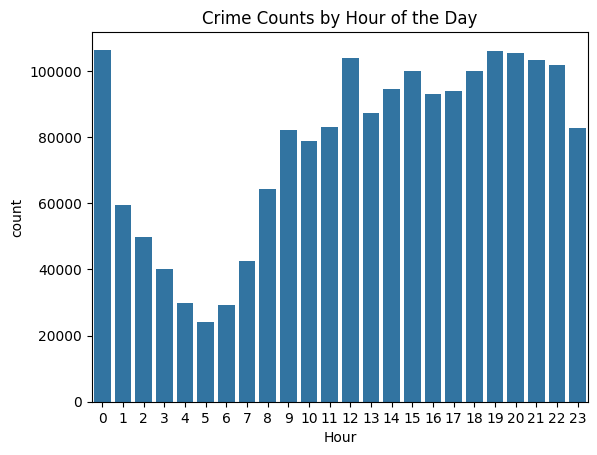

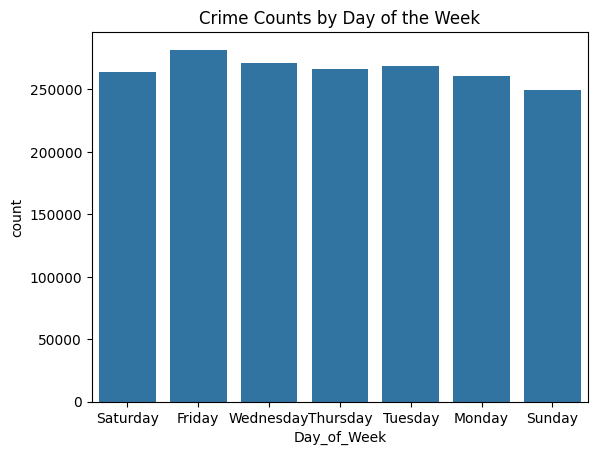

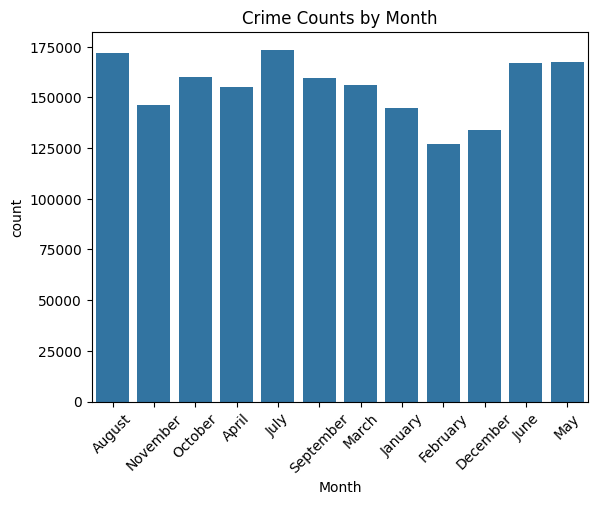

In [43]:
# Load the crime dataset
crime_df = chicago_crime_2008_to_2012_df

# Convert 'Date' to datetime and extract time components
crime_df['Date'] = pd.to_datetime(crime_df['Date'])
crime_df['Hour'] = crime_df['Date'].dt.hour
crime_df['Day_of_Week'] = crime_df['Date'].dt.day_name()
crime_df['Month'] = crime_df['Date'].dt.month_name()

# Plotting crime counts by hour of the day
sns.countplot(x='Hour', data=crime_df)
plt.title('Crime Counts by Hour of the Day')
plt.show()

# Plotting crime counts by day of the week
sns.countplot(x='Day_of_Week', data=crime_df)
plt.title('Crime Counts by Day of the Week')
plt.show()

# Plotting crime counts by month
sns.countplot(x='Month', data=crime_df)
plt.title('Crime Counts by Month')
plt.xticks(rotation=45)
plt.show()


***11.1 Analysis*** 
1. Crime Counts by Hour of the Day: The first graph shows a noticeable decrease in crime during the early morning hours, with incidents starting to rise at around 6 AM and peaking between 12 PM and 9 PM. This pattern could indicate that crimes are more prevalent during the hours of higher activity and social interaction. The lower crime rates during the night and early morning could be attributed to fewer people being outside and potential offenders resting.

2. Crime Counts by Day of the Week: The second graph indicates a relatively consistent number of crimes across all days of the week, with Saturday having the highest count. This might suggest that crimes in Chicago do not significantly fluctuate throughout the week. However, the slight increase on weekends could be related to increased social activities and gatherings.

3. Crime Counts by Month: The third graph shows a variation in crime rates across different months, with August having the highest count and February the lowest. This seasonal trend might be influenced by weather conditions, as warmer months generally have more outdoor activities, leading to more opportunities for crimes.

**11.2**  Analyzing the Impact of Environmental Factors on Crime

Next, I will examine the relationship between crime locations and various environmental factors. This involves analyzing if certain crimes are more prevalent near parks, commercial districts, educational institutions, or residential areas.

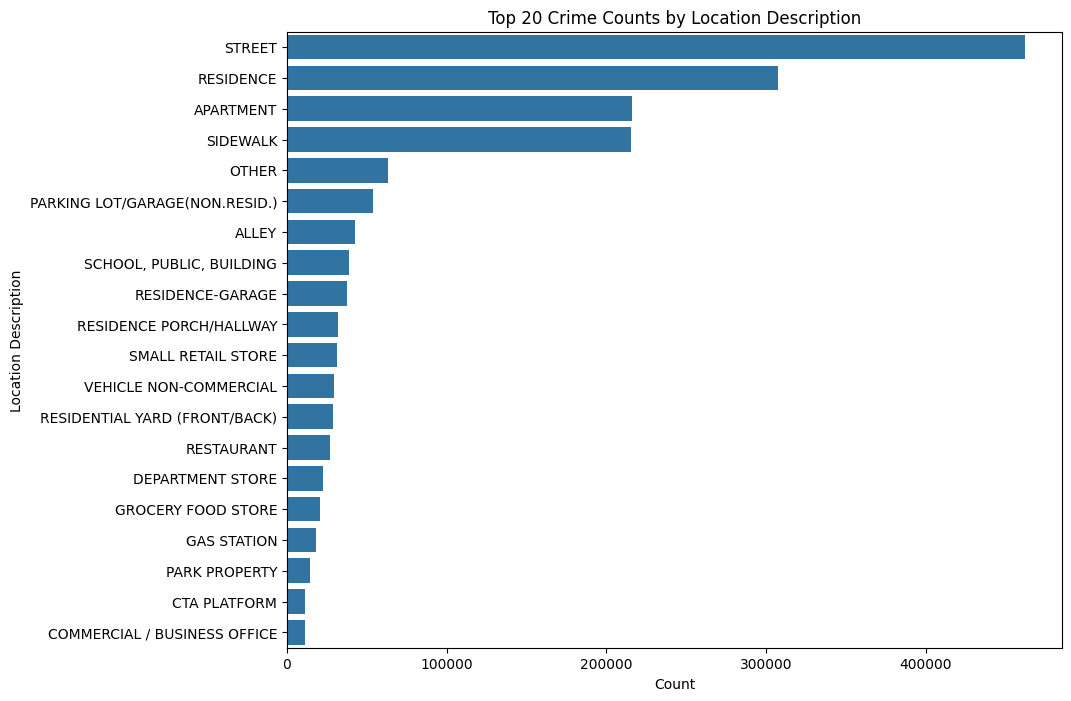

In [44]:
# I will select the top 20 location descriptions by frequency (too many to visualize otherwise)
top_n_locations = 20
top_locations = crime_df['Location Description'].value_counts().nlargest(top_n_locations).index

# Now we filter the dataframe to include only the top location descriptions
top_locations_df = crime_df[crime_df['Location Description'].isin(top_locations)]

# Plotting crime counts by location description (Top N locations)
plt.figure(figsize=(10, 8))
sns.countplot(y='Location Description', data=top_locations_df, order=top_locations_df['Location Description'].value_counts().index)
plt.title('Top 20 Crime Counts by Location Description')
plt.xlabel('Count')
plt.ylabel('Location Description')
plt.show()


***11.2 Analysis***
1. Top 20 Crime Counts by Location Description: The graph reveals that the most common location for crimes is the street, followed by residences and apartments. This suggests that public and semi-public spaces are the most vulnerable to criminal activities, likely due to their accessibility and the presence of valuable items in residences.

**11.3** This code will create a plot showing the distribution of crimes by different times of the day (morning, afternoon, evening, night) for the most common crime locations. This analysis can help identify if certain locations are more prone to crimes at specific times of the day.

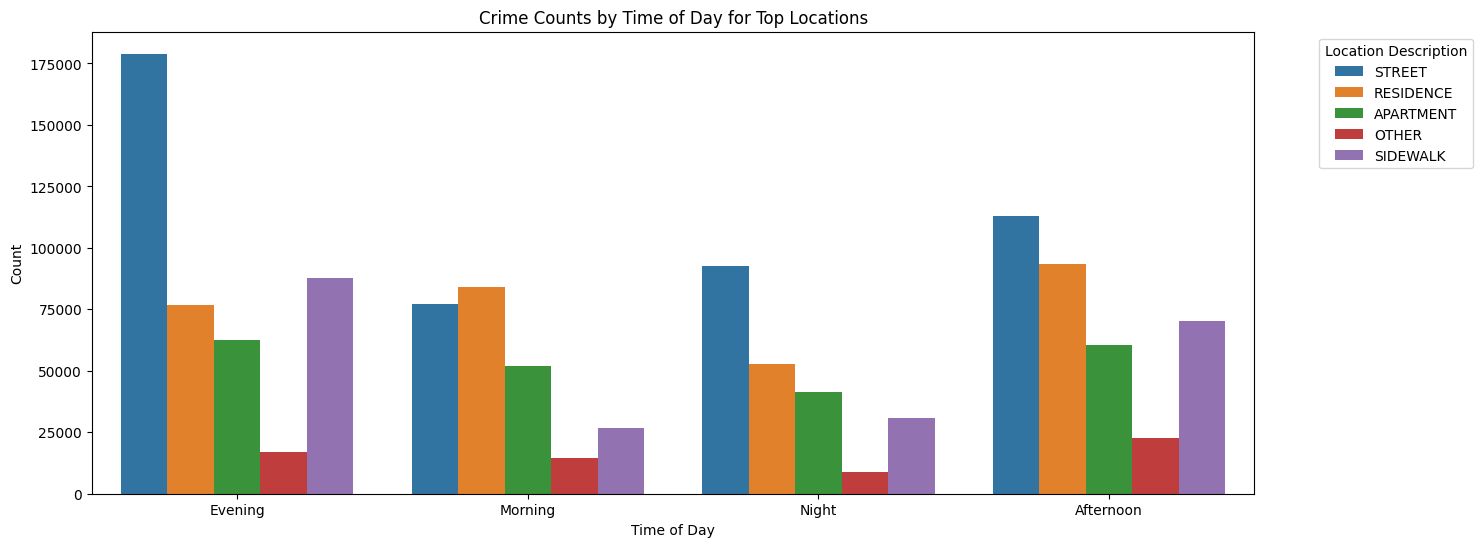

In [45]:
# Creating a time of day category (morning, afternoon, evening, night)
def get_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

crime_df['Hour'] = pd.to_datetime(crime_df['Date']).dt.hour
crime_df['Time of Day'] = crime_df['Hour'].apply(get_time_of_day)

# Plotting the distribution of crimes by time of day for top location descriptions
top_locations = crime_df['Location Description'].value_counts().nlargest(5).index
filtered_df = crime_df[crime_df['Location Description'].isin(top_locations)]

plt.figure(figsize=(15, 6))
sns.countplot(x='Time of Day', hue='Location Description', data=filtered_df)
plt.title('Crime Counts by Time of Day for Top Locations')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.legend(title='Location Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


***11.3 Analysis***
Crime Counts by Time of Day for Top Locations: The graph provides a combined view of crime occurrences by top locations across different times of the day. Streets and apartments tend to have higher crime counts during the evening, while residential locations show a more even distribution throughout the day. This could indicate that crimes on the streets and in apartments are more associated with periods of darkness or late hours when visibility is low and fewer witnesses are around.

In summary, the data suggests that the highest risk of crime occurs in public or semi-public spaces during the evening and night hours, with weekends and warmer months showing a slight increase in crime rates. These insights could be valuable for law enforcement and city planners to optimize patrolling schedules, implement preventive measures, and improve community safety programs. 

# 12 - A moment of reflection

**12.1** Looking back at the analysis that you've done, what do you think about it? Specifically, how reliable are your conclusions? Is there anything that could be done to improve the factuality of the analysis? If so, what?

# Reflection on the analysis conducted
I find the assignment to be comprehensive and methodically structured and designed. I learnt a lot while doing this and am sure there are lots of improvements to be made. The questions aim to focus on essential data analysis practices, such as data cleaning, handling missing values, and detailed examination of various crime-related aspects. These practices are foundational to any robust data analysis and enhance the reliability of the conclusions.

In terms of reliability, the conclusions drawn are based on a systematic approach to data analysis. The focus on data integrity through steps like removing duplicates and identifying missing values ensures the quality of the analysis. However, the reliability is contingent upon the quality of the data sources and the appropriateness of the analytical methods used.

To improve the factuality of the analysis, there are some paths to be followed:

    Validation of Data Sources: It's crucial to ensure that the data used is complete, accurate, and representative of the real-world scenario it is intended to depict which seems to be the case for our project. 

    Handling of Missing Data: The approach to managing missing data can significantly influence the outcomes. Understanding the pattern of missingness and why some fields are empty, might also reveal underlying biases or data collection issues.

    Advanced Statistical Techniques: Incorporating more sophisticated statistical or machine learning techniques could uncover more nuanced insights and account for more complex relationships within the data. This is something I hope to learn and implement within the future courses. 

    Consideration of External Factors: The analysis could be enriched by including external factors such as economic indicators, demographic changes, or policy shifts. This broader context could provide a deeper understanding of the factors influencing crime trends. This was done to some extent by inclusion of chicago census dataset. 

Overall, while the analysis in the chicago assignemnt is and well designed, complete with additional data validation, varied methods for handling missing data, advanced statistical techniques, and a broader consideration of external factors could further strengthen the conclusions and provide a more comprehensive understanding of crime trends in Chicago.

